In [10]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,Flatten,MaxPool2D,BatchNormalization,GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.applications import VGG19
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')
from keras.models import load_model
from google.colab import files
import cv2
from google.colab.patches import cv2_imshow

In [18]:
test_df = pd.read_csv('/content/drive/MyDrive/COURSES/CS231/test_split.txt', sep=" ", header=None)
test_df.columns = ['patient id', 'file_paths', 'labels', 'data source']
test_df = test_df.drop(['patient id', 'data source'], axis=1)

In [19]:
test_df

,file_paths,labels
0,SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9...,pneumonia
1,streptococcus-pneumoniae-pneumonia-temporal-ev...,pneumonia
2,streptococcus-pneumoniae-pneumonia-temporal-ev...,pneumonia
3,streptococcus-pneumoniae-pneumonia-temporal-ev...,pneumonia
4,streptococcus-pneumoniae-pneumonia-temporal-ev...,pneumonia
...,...,...
474,0e03c2d7-9cea-4dc7-8e91-794a8b3ff58d.png,pneumonia
475,1c0a780d-1cac-4eee-b46d-470ecebc9ae0.png,pneumonia
476,1dad3414-88c9-4c56-af5d-3a1488af452c.png,pneumonia
477,2348e8ba-483f-476d-b29d-5ba8398d7abc.png,pneumonia


In [15]:
TEST_PATH = "/content/drive/MyDrive/COURSES/CS231/data/test"

In [16]:
batch_size = 32
img_height = 480
img_width = 480
target_size = (img_height, img_width)

In [20]:
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input)
test_generator = test_datagen.flow_from_dataframe(test_df, directory=TEST_PATH, x_col='file_paths', y_col='labels',
                                                    target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='categorical', shuffle=False)

Found 479 validated image filenames belonging to 3 classes.


In [2]:
vgg19 = load_model('/content/drive/MyDrive/COURSES/CS231/vgg19-2.h5')

In [3]:
vgg19.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 15, 15, 512)       20024384  
_________________________________________________________________
flatten (Flatten)            (None, 115200)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 115200)            460800    
_________________________________________________________________
dense (Dense)                (None, 256)               29491456  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3

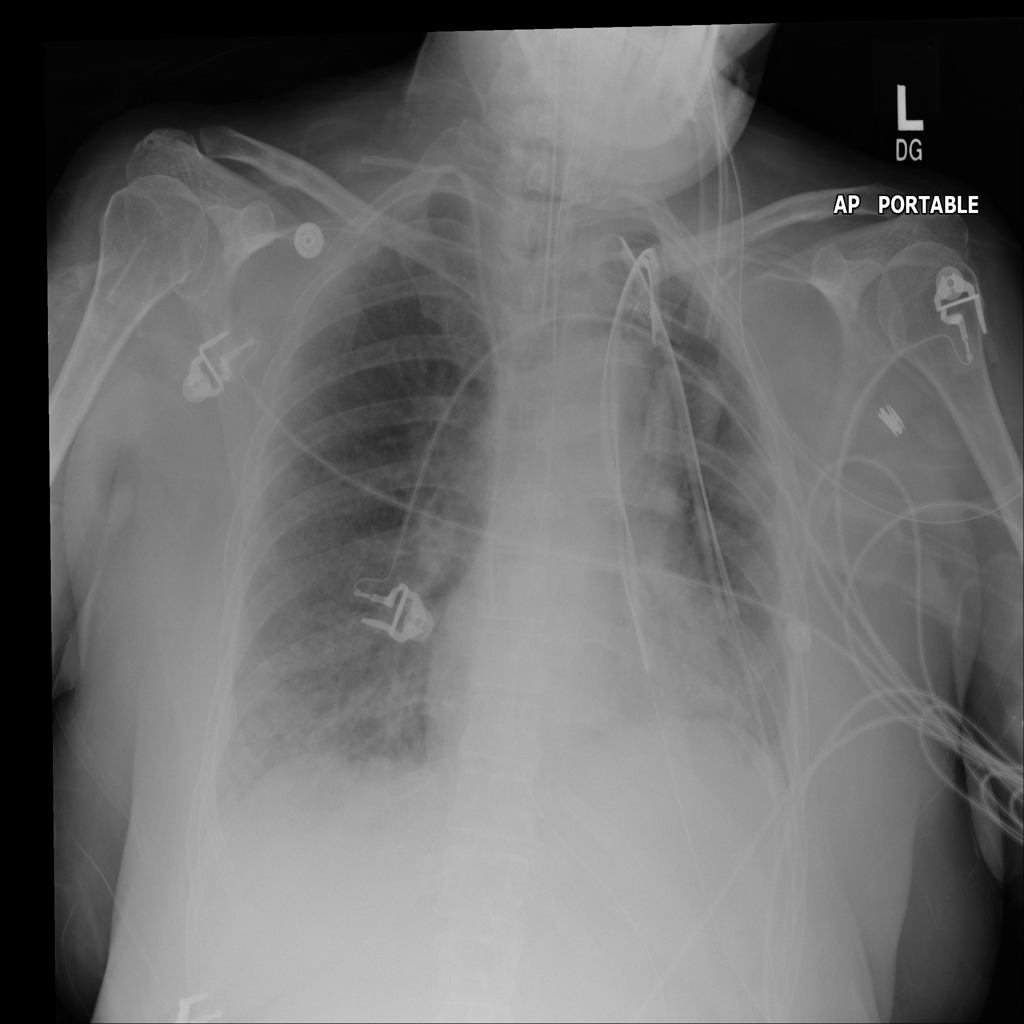

In [12]:
img = cv2.imread('/content/drive/MyDrive/COURSES/CS231/data/test/0a8d486f-1aa6-4fcf-b7be-4bf04fc8628b.png')
cv2_imshow(img)
img = cv2.resize(img,(480,480))
img = np.reshape(img,[1,480,480,3])

In [9]:
vgg19.predict(img)

array([[9.9981064e-01, 2.9015080e-06, 1.8655599e-04]], dtype=float32)

In [23]:
test_generator.class_indices

{'COVID-19': 0, 'normal': 1, 'pneumonia': 2}

In [ ]:
val_loss_vgg = [0.3980, 0.2820, 0.2789, 0.2575, 0.2455, 0.2426, 0.2300, 0.2251, 0.2336, 0.2397, 0.2338, 0.2286, 0.2271]
val_acc_vgg = [0.8609, 0.8961, 0.8968, 0.9025, 0.9104, 0.9118, 0.9147, 0.9226, 0.9154, 0.9140, 0.9154, 0.9183, 0.9233]
val_loss_resnet = [0.4524, 0.4100, 0.3961, 0.3775, 0.3786, 0.3814, 0.3806, 0.3669, 0.3576, 0.3622, 0.3686, 0.3640, 0.3650, 0.3683]
val_acc_resnet = [0.8358, 0.8437, 0.8566, 0.8659, 0.8602, 0.8717, 0.8631, 0.8631, 0.8652, 0.8674, 0.8695, 0.8688, 0.8688, 0.8652]

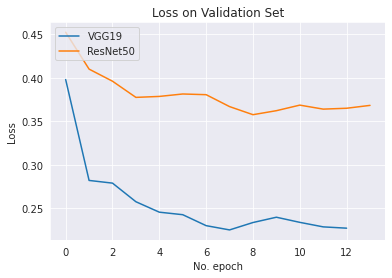

In [ ]:
plt.plot(val_loss_vgg, label='Val Loss (vgg)')
plt.plot(val_loss_resnet, label='Val Loss (resnet)')
plt.title('Loss on Validation Set')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['VGG19', 'ResNet50'], loc="upper left")
plt.savefig("/content/drive/MyDrive/COURSES/CS231/results/result-1.png")
plt.show()

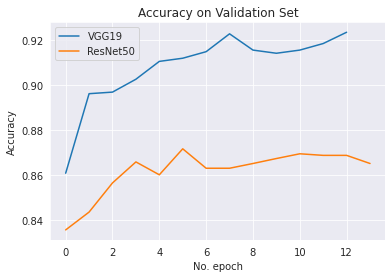

In [ ]:
plt.plot(val_acc_vgg, label='Accuracy (vgg)')
plt.plot(val_acc_resnet, label='Accuracy (resnet)')
plt.title('Accuracy on Validation Set')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(['VGG19', 'ResNet50'], loc="upper left")
plt.savefig("/content/drive/MyDrive/COURSES/CS231/results/result-2.png")
plt.show()

In [ ]:
train_loss_resnet = [0.8399, 0.5290, 0.4260, 0.3859, 0.3566, 0.3277, 0.3181, 0.2832, 0.2755, 0.2660, 0.2666, 0.2558, 0.2458, 0.2550]
train_acc_resnet = [0.6519, 0.8007, 0.8459, 0.8587, 0.8708, 0.8834, 0.8832, 0.9042, 0.9050, 0.9075, 0.9058, 0.9120, 0.9146, 0.9123]
train_loss_vgg = [0.8501, 0.4779, 0.3839, 0.3335, 0.3192, 0.3005, 0.2808, 0.2778, 0.2490, 0.2438, 0.2304, 0.2030, 0.2101]
train_acc_vgg = [0.6373, 0.8184, 0.8603, 0.8820, 0.8854, 0.8961, 0.8983, 0.9011, 0.9096, 0.9115, 0.9191, 0.9286, 0.9261]

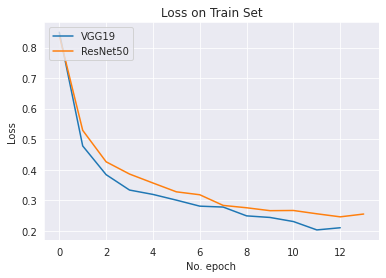

In [ ]:
plt.plot(train_loss_vgg, label='Loss (vgg)')
plt.plot(train_loss_resnet, label='Loss (resnet)')
plt.title('Loss on Train Set')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['VGG19', 'ResNet50'], loc="upper left")
plt.savefig("/content/drive/MyDrive/COURSES/CS231/results/result-3.png")
plt.show()

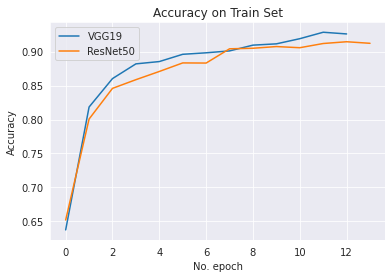

In [ ]:
plt.plot(train_acc_vgg, label='Accuracy (vgg)')
plt.plot(train_acc_resnet, label='Accuracy (resnet)')
plt.title('Accuracy on Train Set')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(['VGG19', 'ResNet50'], loc="upper left")
plt.savefig("/content/drive/MyDrive/COURSES/CS231/results/result-4.png")
plt.show()